## 1. Data retrieval and value estimates


In [1]:
%pip install numpy scipy pandas seaborn matplotlib pyreadr


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 24.1.2
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import math
import numpy as np
import scipy as sc
import pandas as pn
import seaborn as sb
import matplotlib.pyplot as plt
import pyreadr

### Helper function for calculatin mean, variance and median

In [3]:
# For each group, calculate mean, variance, and median of the standard deviation
def calculate_stats(data):
    mean_std = round(data.mean(), 3)
    var_std = round(data.var(), 3)
    median_std = round(data.median(), 3)
    return mean_std, var_std, median_std

### Reading a file and storing it into a DataFrame and dividing into separate groups

In [4]:
# Read file
rda_file_path = 'data/case0202.rda'
result = pyreadr.read_r(rda_file_path)
df = result['case0202']

# Divide the DataFrame into two groups
group_unaffect = df['Unaffect']
group_affected = df['Affected']

# Calculate mean, var and median for the groups 
unaffect_stats = calculate_stats(group_unaffect)
affected_stats = calculate_stats(group_affected)

# Print the results
print("Statistics for 'Unaffect' group:")
print("Mean of the corresponding Deviation:", unaffect_stats[0])
print("Variance of the corresponding Deviation:", unaffect_stats[1])
print("Median of the corresponding Deviation:", unaffect_stats[2])
print("\nStatistics for 'Affected' group:")
print("Mean of the corresponding Deviation:", affected_stats[0])
print("Variance of the corresponding Deviation:", affected_stats[1])
print("Median of the corresponding Deviation:", affected_stats[2])

Statistics for 'Unaffect' group:
Mean of the corresponding Deviation: 1.759
Variance of the corresponding Deviation: 0.059
Median of the corresponding Deviation: 1.77

Statistics for 'Affected' group:
Mean of the corresponding Deviation: 1.56
Variance of the corresponding Deviation: 0.091
Median of the corresponding Deviation: 1.59


## 2. Density and distribution function estimates

### 2.1 Plots for 'Unaffect group'

- The **first** plot is **a histogram of the 'Unaffect' group with the probability density estimated**. 
    Bins are set to 20, and common_norm=True normalizes the histogram.

- The **second** plot is a histogram of the 'Unaffect' group with the **cumulative distribution function estimated**. Bins are set to 20, and cumulative=True creates a cumulative histogram.

- The **third** plot is the **Empirical Cumulative Distribution Function (ECDF)** for the 'Unaffect' group. The marker='o', linestyle='-', color='blue', and markersize=5 parameters customize the appearance of the ECDF plot.


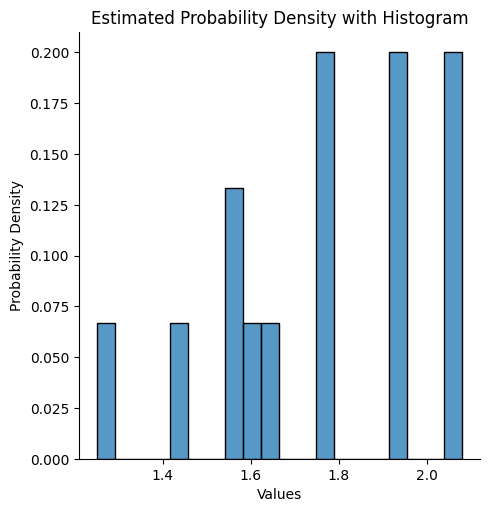

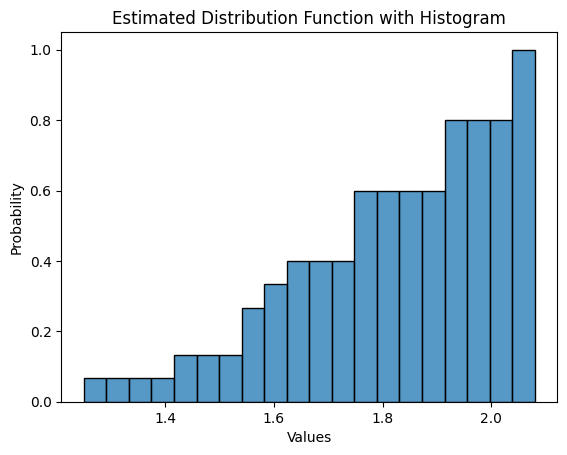

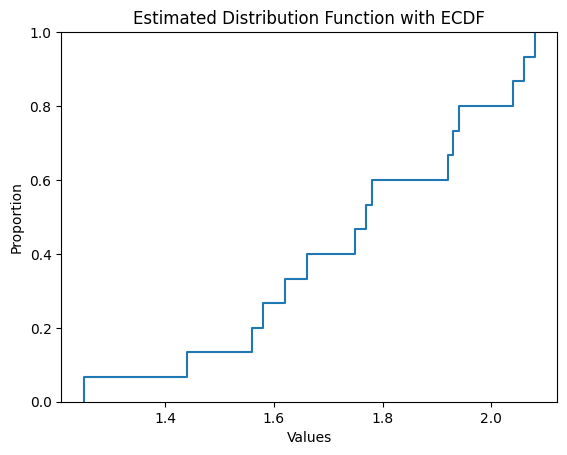

In [5]:
# Plotting the histogram for the 'Unaffect' group to estimate probability density
sb.displot(group_unaffect, stat='probability', bins=20, common_norm=True)
plt.title('Estimated Probability Density with Histogram')
plt.xlabel('Values')
plt.ylabel('Probability Density')
plt.show()

# Plotting the histogram for the 'Unaffect' group to estimate the cumulative distribution function
sb.histplot(group_unaffect, stat='probability', bins=20, cumulative=True)
plt.title('Estimated Distribution Function with Histogram')
plt.xlabel('Values')
plt.show()

# Plotting the Empirical Cumulative Distribution Function (ECDF) for the 'Unaffect' group
sb.ecdfplot(group_unaffect, stat='proportion')
plt.title('Estimated Distribution Function with ECDF')
plt.xlabel('Values')
plt.show()

### 2.2 Plots for "Affected froup" (same parameters)

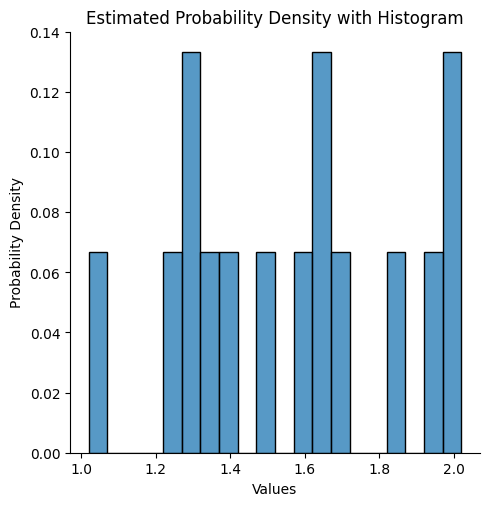

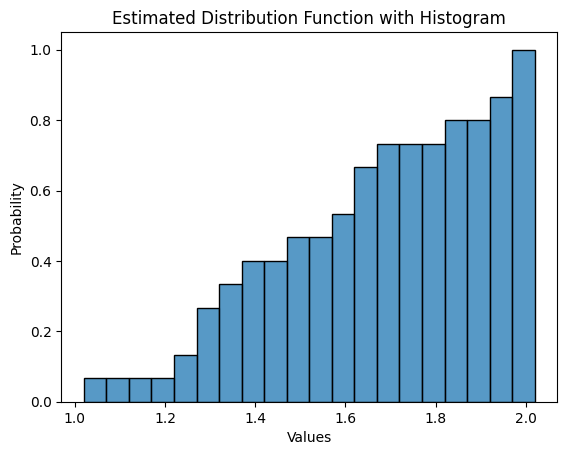

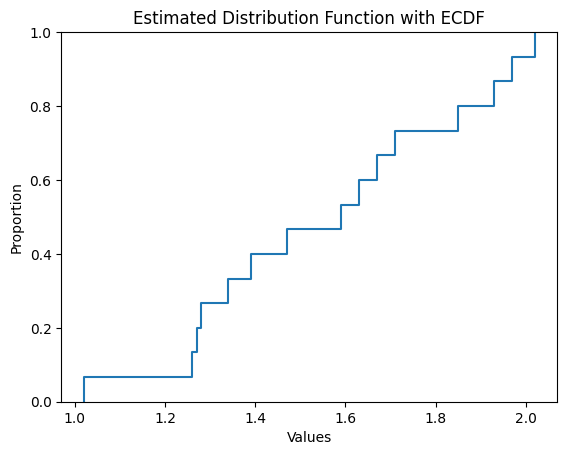

In [6]:
# Plotting the histogram for the 'Affected' group to estimate probability density
sb.displot(group_affected, stat='probability', bins=20, common_norm=True)
plt.title('Estimated Probability Density with Histogram')
plt.xlabel('Values')
plt.ylabel('Probability Density')
plt.show()

# Plotting the histogram for the 'Affected' group to estimate the distribution function (cumulative)
sb.histplot(group_affected, stat='probability', bins=20, cumulative=True)
plt.title('Estimated Distribution Function with Histogram')
plt.xlabel('Values')
plt.show()

# Plotting the Empirical Cumulative Distribution Function (ECDF) for the 'Affected' group
sb.ecdfplot(group_affected, stat='proportion')
plt.title('Estimated Distribution Function with ECDF')
plt.xlabel('Values')
plt.show()

## 3. Odhady parametrů normálního, exponenciálního a rovnoměrného rozdělení

### 3.1 Normal distribution

#### Calculating normal distribution

- **np.mean** is used to calculate the mean **($μ$)** of each group.
- **np.std** is used to calculate the standard deviation **($σ$)** of each group, and ddof=1 is specified for sample standard deviation.

In [7]:
# Calculate mean (mu) and standard deviation (sigma) for 'Unaffect' group
mu_unaffect = np.mean(group_unaffect)
sigma_unaffect = np.std(group_unaffect, ddof=1)  # ddof=1 for sample standard deviation

# Calculate mean (mu) and standard deviation (sigma) for 'Affected' group
mu_affected = np.mean(group_affected)
sigma_affected = np.std(group_affected, ddof=1)

# Print estimated parameters for normal distribution of 'Unaffect' group
# The parameters include mean (mu) and standard deviation (sigma)
print('Estimated parameters for normal distribution of Unaffect group:\n Mean:\t{}\n Standard Deviation:\t{}'.format(
    round(mu_unaffect, 3), round(sigma_unaffect, 3)))

# Print estimated parameters for normal distribution of 'Affected' group
# The parameters include mean (mu) and standard deviation (sigma)
print('Estimated parameters for normal distribution of Affected group:\n Mean:\t{}\n Standard Deviation:\t{}'.format(
    round(mu_affected, 3), round(sigma_affected, 3)))

Estimated parameters for normal distribution of Unaffect group:
 Mean:	1.759
 Standard Deviation:	0.242
Estimated parameters for normal distribution of Affected group:
 Mean:	1.56
 Standard Deviation:	0.301


### 3.2 Exponential distribution

#### Calculating exponential distribution
- **exp_lambda_unaffect and exp_lambda_affected** are calculated as the **reciprocal of the mean (μ) for the 'Unaffect' and 'Affected' groups**, respectively.

In [8]:
# Calculate the lambda (rate parameter) for exponential distribution for 'Unaffect' group
# Lambda is the reciprocal of the mean (mu) for exponential distribution
exp_lambda_unaffect = 1 / mu_unaffect

# Calculate the lambda (rate parameter) for exponential distribution for 'Affected' group
exp_lambda_affected = 1 / mu_affected

# Print estimated lambda parameter for exponential distribution of 'Unaffect' group
print('Estimated parameters for exponential distribution of Unaffect group:\n Lambda:\t{}'.format(
    round(exp_lambda_unaffect, 3)))

# Print estimated lambda parameter for exponential distribution of 'Affected' group
print('Estimated parameters for exponential distribution of Affected group:\n Lambda:\t{}'.format(
    round(exp_lambda_affected, 3)))

Estimated parameters for exponential distribution of Unaffect group:
 Lambda:	0.569
Estimated parameters for exponential distribution of Affected group:
 Lambda:	0.641


### 3.3 Uniform distribution

#### Calculating uniform distribution

- **a_unaffect and b_unaffect are calculated as the minimum and maximum values of the 'Unaffect' group**, respectively.
   
- **a_affected and b_affected are calculated as the minimum and maximum values of the 'Affected' group**, respectively.
   
- The print statements **display the estimated parameters for the uniform distribution** of both 'Unaffect' and 'Affected' groups, representing the **interval range as the minimum and maximum values** of each group.

In [9]:
# Calculate parameters for uniform distribution for 'Unaffect' group
a_unaffect = np.min(group_unaffect)
b_unaffect = np.max(group_unaffect)

# Calculate parameters for uniform distribution for 'Affected' group
a_affected = np.min(group_affected)
b_affected = np.max(group_affected)

# Print estimated parameters for uniform distribution of 'Unaffect' group
# The interval range represents the minimum and maximum values of the group
print('Estimated parameters for uniform distribution of Unaffect group:\n Interval range:\t({}, {})'.format(
    round(a_unaffect, 3), round(b_unaffect, 3)))

# Print estimated parameters for uniform distribution of 'Affected' group
# The interval range represents the minimum and maximum values of the group
print('Estimated parameters for uniform distribution of Affected group:\n Interval range:\t({}, {})'.format(
    round(a_affected, 3), round(b_affected, 3)))

Estimated parameters for uniform distribution of Unaffect group:
 Interval range:	(1.25, 2.08)
Estimated parameters for uniform distribution of Affected group:
 Interval range:	(1.02, 2.02)


### Plots 

- The **pink histogram** represents the observed data for the 'Unaffect' group, with the y-axis scaled to represent probabilities.
    
- The **blue curve** depicts a **fitted uniform distribution based on the estimated parameters of the 'Unaffect' group**. The uniform distribution assumes equal probability across the observed interval range.
    
- The **orange curve** represents a **fitted normal distribution using the estimated mean** **($μ$)** and standard deviation **($σ$)** of the 'Unaffect' group. The normal distribution is characterized by a bell-shaped curve.
    
- The **green curve** illustrates a **fitted exponential distribution with the estimated rate parameter** **($λ$)** for the 'Unaffect' group. The exponential distribution describes the time between independent events occurring at a constant rate.

    
- **Conclusion**: The comparison aims to visually assess **how well each distribution type fits the observed data**. The legend indicates which curve corresponds to each distribution type. The y-axis limit is set to better visualize the differences in probability density.

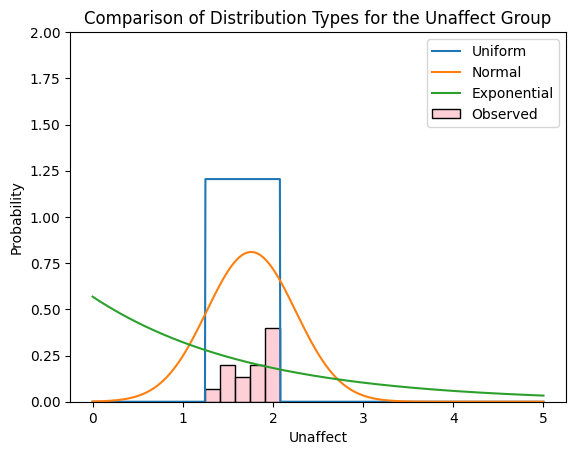

In [10]:
# Plotting the observed data for 'Unaffect' group as a histogram
sb.histplot(group_unaffect, stat='probability', color='pink', label="Observed")
x = np.linspace(0, 5, 1000)

# Fitting a uniform distribution to the estimated parameters
loc, scale = sc.stats.uniform.fit(np.linspace(a_unaffect, b_unaffect, 1000))

# Plotting the uniform distribution with estimated parameters
plt.plot(x, sc.stats.uniform.pdf(x, loc, b_unaffect - a_unaffect), label="Uniform")

# Plotting the normal distribution with estimated parameters
plt.plot(x, sc.stats.norm.pdf(x, mu_unaffect, math.sqrt(sigma_unaffect)), label="Normal")

# Plotting the exponential distribution with estimated parameters
plt.plot(x, sc.stats.expon.pdf(x, scale=1/exp_lambda_unaffect), label="Exponential")

# Setting the y-axis limit
plt.ylim(0, 2)
# Adding title and legend
plt.title("Comparison of Distribution Types for the Unaffect Group")
plt.legend()
plt.show()

**Same for the 'Affected group'**

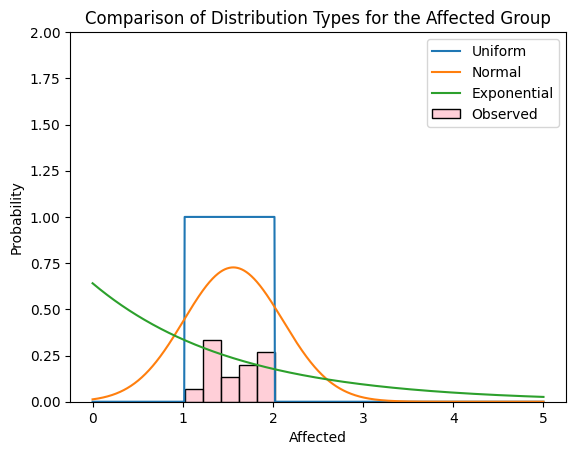

In [11]:
# Plotting the observed data for 'Affected' group as a histogram
sb.histplot(group_affected, stat='probability', color='pink', label="Observed")
x = np.linspace(0, 5, 1000)

# Plotting the uniform distribution with estimated parameters
plt.plot(x, sc.stats.uniform.pdf(x, a_affected, b_affected - a_affected), label="Uniform")

# Plotting the normal distribution with estimated parameters
plt.plot(x, sc.stats.norm.pdf(x, mu_affected, math.sqrt(sigma_affected)), label="Normal")

# Plotting the exponential distribution with estimated parameters
plt.plot(x, sc.stats.expon.pdf(x, scale=1/exp_lambda_affected), label="Exponential")

# Setting the y-axis limit
plt.ylim(0, 2)
# Adding title and legend
plt.title("Comparison of Distribution Types for the Affected Group")
plt.legend()
plt.show()


## 4. Data generation

### 4.1 Unaffect and Affected groups

- **Real Unaffect and Affected (Observed)**:
    - The **blue histogram** represents the observed values for the **'Unaffect' group from the actual dataset**.
    - The kernel density estimate **(KDE) curve is overlaid to provide a smooth representation of the data distribution**.

- **Artificial Unaffect and Affected (Simulated)**:
    - The **orange histogram** illustrates the distribution of **100 artificial/simulated values generated from a normal distribution** with parameters estimated from the 'Unaffect' group (mean and standard deviation).
    - The **KDE curve for the simulated values is also included for comparison**.

- **Title and Legend**:
    - The title, "Comparison of Simulated and Observed Values for Unaffect," summarizes the purpose of the plot.
    - The legend indicates which color corresponds to the observed values ('Real Unaffect') and which corresponds to the simulated values ('Artificial Unaffect').

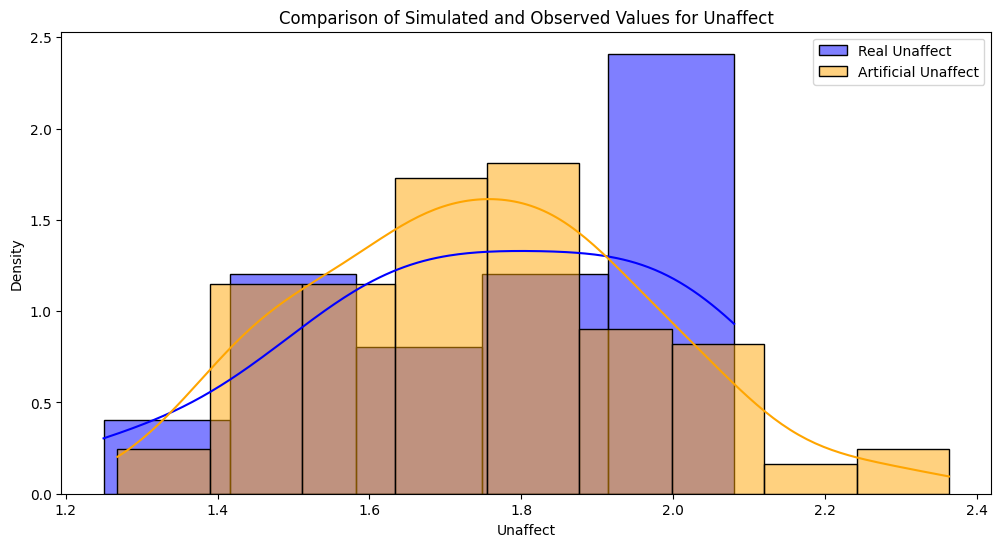

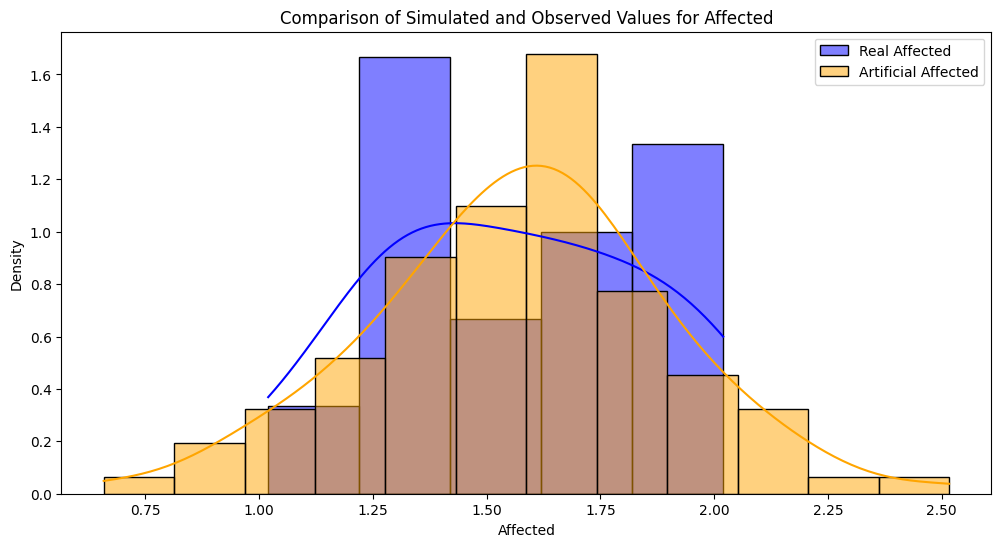

In [12]:
# Generate a sample of 100 values from a normal distribution for the 'Unaffect' group
sample_unaffect_normal = np.random.normal(mu_unaffect, sigma_unaffect, 100)

# Visualization of the comparison between simulated and observed values for 'Unaffect'
plt.figure(figsize=(12, 6))
# Plotting the observed values for 'Unaffect' as a histogram
sb.histplot(df['Unaffect'], color='blue', label='Real Unaffect', kde=True, stat='density')
# Plotting the artificial/simulated values for 'Unaffect' as a histogram
sb.histplot(sample_unaffect_normal, color='orange', label='Artificial Unaffect', kde=True, stat='density')
# Adding title and legend
plt.title('Comparison of Simulated and Observed Values for Unaffect')
plt.legend()
plt.show()


# Generate a sample of 100 values from a normal distribution for the 'Affected' group
sample_affected_normal = np.random.normal(mu_affected, sigma_affected, 100)

# Visualization of the comparison between simulated and observed values for 'Affected'
plt.figure(figsize=(12, 6))
# Plotting the observed values for 'Affected' as a histogram
sb.histplot(df['Affected'], color='blue', label='Real Affected', kde=True, stat='density')
# Plotting the artificial/simulated values for 'Affected' as a histogram
sb.histplot(sample_affected_normal, color='orange', label='Artificial Affected', kde=True, stat='density')
# Adding title and legend
plt.title('Comparison of Simulated and Observed Values for Affected')
plt.legend()
plt.show()



## 5. Konfidenční intervaly

- **Mean and Standard Deviation:**
    - The mean **$\bar{x}$** and **sample standard deviation ($s$)** of the 'Unaffect' and 'Affect' groups are calculated using **np.mean and np.std** with ddof=1 (sample standard deviation).
      
- **Sample Size:**
    - The sample size **($n$)** for the 'Unaffect' and 'Affected' groups is determined using **len(group_unaffect)**
      
- **95% Confidence Interval for Mean:**
    - The 95% confidence interval for the mean is calculated using **sc.stats.t.interval**.
    - Parameters include the **desired confidence level** (confidence=0.95), **degrees of freedom** (df=n_unaffect-1), **mean** (loc=mean_unaffect), and **standard error of the mean** (scale=std_unaffect/np.sqrt(n_unaffect)).

- **Printing Confidence Interval:**
    - The print statement displays the 95% confidence interval for the 'Affected' group.
      
- **Conclusion:**
    - The confidence interval provides a range within which we can reasonably expect the true population mean to fall with a specified level of confidence (in this case, 95%).

In [13]:
# Calculate the mean and standard deviation for 'Unaffect' group
mean_unaffect = np.mean(group_unaffect)
std_unaffect = np.std(group_unaffect, ddof=1)  # Sample standard deviation
n_unaffect = len(group_unaffect)

# Calculate the 95% confidence interval for the mean of the 'Unaffect' group
ci_unaffect = sc.stats.t.interval(confidence=0.95, df=n_unaffect-1, loc=mean_unaffect, scale=std_unaffect/np.sqrt(n_unaffect))

# Calculate the mean and standard deviation for 'Affected' group
mean_affected = np.mean(group_affected)
std_affected = np.std(group_affected, ddof=1)
n_affected = len(group_affected)

# Calculate the 95% confidence interval for the mean of the 'Affected' group
ci_affected = sc.stats.t.interval(confidence=0.95, df=n_affected-1, loc=mean_affected, scale=std_affected/np.sqrt(n_affected))

# Print the 95% confidence intervals for both groups
print('95% confidence interval for Unaffect group:\n Interval range:\t{}, \t{}'.format(round(ci_unaffect[0], 3), round(ci_unaffect[1], 3)))
print('95% confidence interval for Affected group:\n Interval range:\t{}, \t{}'.format(round(ci_affected[0], 3), round(ci_affected[1], 3)))

95% confidence interval for Unaffect group:
 Interval range:	1.624, 	1.893
95% confidence interval for Affected group:
 Interval range:	1.393, 	1.727


## 6. Testovani Hypotez

- **Hypothetical Mean (K):**
    - A hypothetical mean value, **K = 1.5**, is chosen for testing purposes.
- **One-Sample t-Test:**
    - For both the 'Unaffect' and 'Affected' groups, a one-sample t-test is performed using **sc.stats.ttest_1samp**. This test compares the mean of each group against the hypothetical value K.
- **Test Results:**
    - The t-statistic and p-value for each group are printed to the console.
- **Interpretation at 5% Significance Level:**
    - The results are interpreted at the 5% significance level **(alpha = 0.05).**
    - If the p-value is **less** than alpha, **the null hypothesis is rejected**, indicating that the mean is statistically significantly different from K.
    - If the p-value is **greater than or equal** to alpha, there is **not enough evidence to reject the null hypothesis**.
- **Conclusion:**
    - This code provides a statistical test to assess whether the means of the 'Unaffect' and 'Affected' groups are significantly different from the chosen hypothetical value **(K)**. The interpretation of the results is based on the p-value and the chosen significance level.

In [14]:
K = 1.5  # Hypothetical mean value for testing

# Test for 'Unaffect' group
# Performing a one-sample t-test to compare the mean of the 'Unaffect' group against the hypothetical value K
t_stat_unaffect, p_value_unaffect = sc.stats.ttest_1samp(group_unaffect, K)

# Test for 'Affected' group
# Performing a one-sample t-test to compare the mean of the 'Affected' group against the hypothetical value K
t_stat_affected, p_value_affected = sc.stats.ttest_1samp(group_affected, K)

# Printing the test results
print(f"Test for Unaffect: t-statistic = {round(t_stat_unaffect, 3)}, p-value = {round(p_value_unaffect, 3)}")
print(f"Test for Affected: t-statistic = {round(t_stat_affected, 3)}, p-value = {round(p_value_affected, 3)}")

# Interpreting the results at the 5% significance level
alpha = 0.05
if p_value_unaffect < alpha:
    print("\nFor Unaffect, we reject the null hypothesis, the mean is statistically significantly different from K.")
else:
    print("\nFor Unaffect, we do not reject the null hypothesis, there is not enough evidence that the mean is different from K.")

if p_value_affected < alpha:
    print("For Affected, we reject the null hypothesis, the mean is statistically significantly different from K.")
else:
    print("For Affected, we do not reject the null hypothesis, there is not enough evidence that the mean is different from K.")

Test for Unaffect: t-statistic = 4.132, p-value = 0.001
Test for Affected: t-statistic = 0.771, p-value = 0.453

For Unaffect, we reject the null hypothesis, the mean is statistically significantly different from K.
For Affected, we do not reject the null hypothesis, there is not enough evidence that the mean is different from K.


## 7. Hladina 5%

- **Two-Sample t-Test:**
    - A two-sample t-test is performed using **sc.stats.ttest_ind** to compare the means of the 'Unaffect' and 'Affected' groups.
- **Null and Alternative Hypotheses:**
    - The null hypothesis ($H_0$) states that the means of both groups **are the same**.
    - The alternative hypothesis ($H_a$)​) states that the means of both groups **are different**.
- **Test Results:**
    - The t-statistic and p-value for the two-sample t-test are printed to the console.
- **Interpretation at 5% Significance Level:**
    - The results are interpreted at the 5% significance level ($α$=0.05).
    - If the p-value is **less** than alpha, **the null hypothesis is rejected**, indicating that the means of the 'Unaffect' and 'Affected' groups are statistically significantly different.
    - If the p-value is **greater** than or equal to alpha, **there is not enough evidence to reject the null hypothesis**.
- **Conclusion:**
    - This code provides a statistical test to assess whether the means of the 'Unaffect' and 'Affected' groups are significantly different from each other. The interpretation is based on the p-value and the chosen significance level.

In [15]:
# To test the equality of means of two independent samples, we use the two-sample t-test.
# Null hypothesis (H0): The means of both groups are the same.
# Alternative hypothesis (Ha): The means of both groups are different.

# Performing the two-sample t-test
# We use equal_var=False when the variances of the two groups are assumed to be different
t_stat, p_value = sc.stats.ttest_ind(group_unaffect, group_affected, equal_var=False)

# Printing the test results
print(f"Two-sample t-test: t-statistic = {round(t_stat, 3)}, p-value = {round(p_value, 3)}")

# Interpreting the results at a 5% significance level
alpha = 0.05
if p_value < alpha:
    print("We reject the null hypothesis, the means of the Unaffect and Affected groups are statistically significantly different.")
else:
    print("We do not reject the null hypothesis, there is not enough evidence to claim that the means are different.")

Two-sample t-test: t-statistic = 1.99, p-value = 0.057
We do not reject the null hypothesis, there is not enough evidence to claim that the means are different.
